In [ ]:
# this is an example of additive effect of G and E.
# i.e. G and E independently affect phenotype.

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# make toy data
df=pd.DataFrame()
df['E']= [1] * 50 + [2] * 50  # environment
df['G']=[ random.choice([0, 1, 2]) for _ in range(100) ]  # genotype
df['pheno']= np.random.rand(100) * (df['G'] + df['E'])  # phenotype, additive of G and E

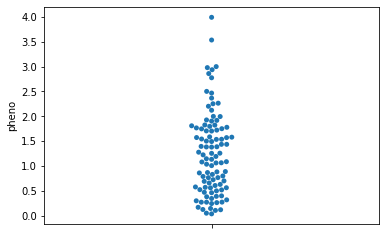

In [3]:
sns.swarmplot(data=df, y='pheno')

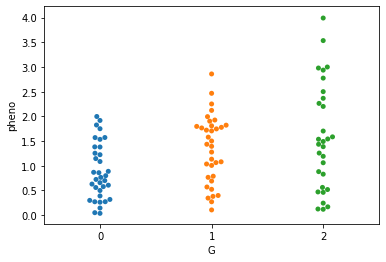

In [4]:
sns.swarmplot(data=df, x='G', y='pheno')

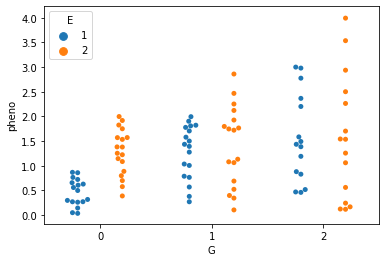

In [5]:
sns.swarmplot(data=df, x='G', y='pheno', hue='E', dodge=True)

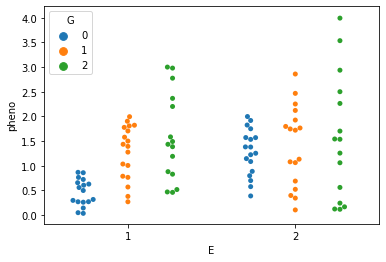

In [6]:
sns.swarmplot(data=df, x='E', y='pheno', hue='G', dodge=True)

In [7]:
# fit linear model, GxE
reg=smf.ols(formula='pheno ~ G + E', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     8.870
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           0.000290
Time:                        21:46:50   Log-Likelihood:                -114.55
No. Observations:                 100   AIC:                             235.1
Df Residuals:                      97   BIC:                             242.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4199      0.262      1.604      0.112      -0.100       0.939
G              0.3511      0.096      3.657      0.000       0.161       0.542
E              0.3297      0.154      2.134      0.035       0.023       0.636
==============================================================================
Omnibus:                        0.756   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.503
Skew:                           0.171   Prob(JB):                        0.778
Kurtosis:                       3.065   Cond. No.                         8.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""